# Планирование камапнии на 2017 год по продажам игр


Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Нужно отработать принцип работы с данными.

**Цель исследования.**
 Выявить определяющие успешность игры закономерности .
 
**Гипотезы необходимые для проверки**
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 
**Задачи исследования**
- Посмотреть сколько игр выпускалось в разные годы;
- Посмотреть как менялись продажи по платформам, выбрать платформы с наиболшими суммарными продажами и простоить распределение по годам;
- Выявить за какой характерный срок появляются новые и исчезают старые платформы;
- Определить какие платформы лидируют по продажам, растут или падают;
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам;
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами;
- Соотнести выводы с продажами игр на других платформах;
- Посмотреть на общее распределение игр по жанрам.

**Ход исследования**
 1. Обзор данных.
 2. Предобработка данных. 
 3. Исследовательский анализ данных.
 4. Исследования гипотез.
 5. Анализ результатов.
 
Каждый ход исследования заканчивается выводом. В конце исследования даётся обощающий вывод по всему исследованию

**Особенности**
- В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## Обзор и предобработка данных

[Сразу к выводу](#section_id1)

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
try:
    games_data = pd.read_csv('/datasets/games.csv')
except:
    games_data = pd.read_csv('games.csv')

**Таблица games (информация об играх):**
-	Name — название игры
-	Platform — платформа
-	Year_of_Release — год выпуска
-	Genre — жанр игры
-	NA_sales — продажи в Северной Америке (миллионы проданных копий)
-	EU_sales — продажи в Европе (миллионы проданных копий)
-	JP_sales — продажи в Японии (миллионы проданных копий)
-	Other_sales — продажи в других странах (миллионы проданных копий)
-	Critic_Score — оценка критиков (максимум 100)
-	User_Score — оценка пользователей (максимум 10)
-	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [3]:
games_data['Name'].value_counts()

Need for Speed: Most Wanted       12
LEGO Marvel Super Heroes           9
FIFA 14                            9
Ratatouille                        9
Madden NFL 07                      9
                                  ..
Nobunaga no Yabou: Ranseiki        1
Classic NES Series: Excitebike     1
Disney's Lilo & Stitch             1
Hunter: The Reckoning Redeemer     1
Dino Crisis 2                      1
Name: Name, Length: 11559, dtype: int64

<div class="alert alert-block alert-info">
<b>Посмтрим с чем мы будем работать</b>       
</div>

In [4]:
games_data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<div class="alert alert-block alert-info">
<b>присутствуют пустые значения</b>       
</div>

In [5]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-info">
<b>посмотрим сколько их в долях</b>       
</div>

In [6]:
games_data.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

### Краткий вывод по первому шагу.
<a id='section_id1'></a>


Есть пустые значения которые необходимо преобработать, ряд столбцов находиьтся в не самом оптимальном для анализа типе данных (пример User_Score).

## Предобработка данных

[Сразу к выводу](#section_id2)

<div class="alert alert-block alert-info">
<b>приведем столбцы к однообразному виду</b>       
</div>

In [7]:
games_data.columns = games_data.columns.str.lower()

<div class="alert alert-block alert-info">
<b>преобразуем значения столбца с названиями игр в нижний регистр</b>       
</div>

In [8]:
games_data['name'] = games_data['name'].str.replace(' ', '_').str.lower()

In [9]:
games_data[games_data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<div class="alert alert-block alert-info">
<b>Т.К. доля пустых значений по столбцу мала,а также из-за того что не представляется возможным чем заменить эти категориальные значения, удалим из таблицы эти пустые строки
</b>       
</div>

In [10]:
games_data = games_data.dropna(subset=['name']).reset_index(drop=True)

In [11]:
games_data['year_of_release'] = games_data['year_of_release'].astype('Int64')

In [12]:
games_data[games_data['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden_nfl_2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa_soccer_2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego_batman:_the_videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe_smackdown_vs._raw_2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space_invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


<div class="alert alert-block alert-info">
<b>удаляем пропуски по полю год выпуска игры.</b>       
</div>

In [14]:
games_data = games_data.dropna(subset=['year_of_release']).reset_index(drop=True)

<div class="alert alert-block alert-info">
<b>по столбцу с жанром игр пустых значений нет, поэтому просто преобразуем их в нижний регистр</b>       
</div>

In [15]:
games_data['genre'] = games_data['genre'].str.lower()

Быстрый серф привел к тому, что tbd - это либо еще не оцененная, либо игра у которой еще недостаточно оценок.
[источник](https://www.allacronyms.com/TBD/game "ссылка на источник")

<div class="alert alert-block alert-info">
<b>заменим tbd-оценки на пропуски</b>       
</div>

In [16]:
games_data['user_score'] = games_data['user_score'].replace('tbd', np.nan).astype('float')

В столбце "rating" находится рейтинг от организации ESRB, подобная категориальная переменная сложна с точки зрения заполнения. На сайте [организации](https://www.esrb.org/ratings-guide/#rating_cat) нет оценки (не оценена или сложна в оценивании), поэтому заменю пустые значения на значение NR - No rating.

In [17]:
games_data['rating'] = games_data['rating'].fillna('NR')

<div class="alert alert-block alert-info">
<b>Заполним пустые значения по оценкам пользователей медианным значением в зависимости от жанра, также поступим с оценками критиков
</b>       
</div>

In [18]:
games_data['user_score'] = games_data['user_score'].fillna(games_data.groupby(['genre','rating'])['user_score'].transform('median'))
games_data['critic_score'] = games_data['critic_score'].fillna(games_data.groupby(['genre','rating'])['critic_score'].transform('median'))

[Text(0.5, 1.0, 'Распределение оценок пользователей'),
 Text(0.5, 0, 'Оценки пользователей'),
 Text(0, 0.5, 'Количество, шт')]

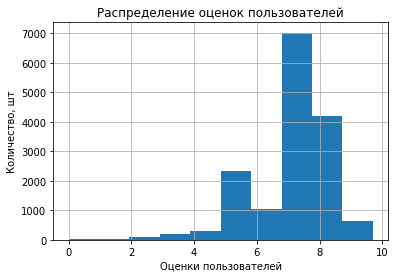

In [19]:
games_data['user_score'].hist().set(title='Распределение оценок пользователей', xlabel='Оценки пользователей', ylabel='Количество, шт')

[Text(0.5, 1.0, 'Распределение оценок критиков'),
 Text(0.5, 0, 'Оценки критиков'),
 Text(0, 0.5, 'Количество, шт')]

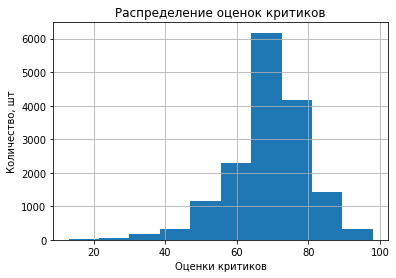

In [20]:
games_data['critic_score'].hist().set(title='Распределение оценок критиков', xlabel='Оценки критиков', ylabel='Количество, шт')

Чтож, в принципе нормальное распределение просматривается, будем считать что всё корректно, без излишних выбросов.

Отдельным пунктов в задании написано, что необходио посчитать суммарные продажи во всех регионах и записать их в отдельный столбец. Займемся этим.

<div class="alert alert-block alert-info">
<b>Добавим столбец с суммой продаж по всем регионам
</b>       
</div>

In [21]:
games_data['total_sales'] = games_data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [23]:
games_data.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.019886
user_score         0.033812
rating             0.000000
total_sales        0.000000
dtype: float64

<a id='section_id2'></a>
### Краткий вывод по второму шагу.

Первым делом мы преобразовали все столбцы к одному регистру, ибо золотое правило "лучше безобрано, но однообразно" не я придумал. 

В последствии выявив пустые значения по столбцам мы принялись заполнять, те которые посчитали возможным.
* Так для столбца "year_of_release" мы заполнили пустые значения значениями года если он присутствовал в названии игры
* Для значений по рейтингу для пустых проставили NR 
* А для значений оценки критиков и оценки пользователей использовали медианным значением в зависимости от жанра игры и рейтинга игры от ESRB, предварительно поменяв значение tbd на пустые.


### Касательно дубликатов.

In [24]:
games_data.duplicated().sum()

0

<div class="alert alert-block alert-info">
<b>Явных дубликатов в исходном файле нет.
Дубликаты по платформе - нормальны. Это не дубликаты, это разные игры на одной платформе.
С жанром та же ситуация.
Относительным первичным ключом может служить название игры, её и нужно рассмотреть подробнее.
</b>       
</div>

In [25]:
games_data['name'].duplicated().sum()

5018

In [26]:
games_data['name'].value_counts()

need_for_speed:_most_wanted      12
ratatouille                       9
fifa_14                           9
lego_marvel_super_heroes          9
madden_nfl_07                     8
                                 ..
tom_clancy's_splinter_cell_3d     1
wrestle_kingdom                   1
hakuouki:_yuugi_roku              1
fireball                          1
derby_stallion_99                 1
Name: name, Length: 11426, dtype: int64

In [27]:
games_data.query('name == "need_for_speed:_most_wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
252,need_for_speed:_most_wanted,PS2,2005,racing,2.03,1.79,0.08,0.47,82.0,9.1,T,4.37
519,need_for_speed:_most_wanted,PS3,2012,racing,0.71,1.46,0.06,0.58,66.0,7.5,NR,2.81
1177,need_for_speed:_most_wanted,X360,2012,racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1574,need_for_speed:_most_wanted,X360,2005,racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
1976,need_for_speed:_most_wanted,XB,2005,racing,0.53,0.46,0.00,0.05,83.0,8.8,T,1.04
2025,need_for_speed:_most_wanted,PSV,2012,racing,0.33,0.45,0.01,0.22,66.0,7.5,NR,1.01
3531,need_for_speed:_most_wanted,GC,2005,racing,0.43,0.11,0.00,0.02,80.0,9.1,T,0.56
5883,need_for_speed:_most_wanted,PC,2005,racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
6177,need_for_speed:_most_wanted,WiiU,2013,racing,0.13,0.12,0.00,0.02,66.0,7.5,NR,0.27
6310,need_for_speed:_most_wanted,DS,2005,racing,0.24,0.01,0.00,0.02,45.0,6.1,E,0.27


<div class="alert alert-block alert-info">
<b>
Дубликаты по названию нормальны, это переиздания на разных платформах или годах. Не дубликаты в чистом виде. Значит с дубликатами можно закончить.
</b>       
</div>

## Исследовательский анализ данных

[Сразу к общему выводу](#section_id3)

#### Распределение по годам
[Сразу к промежуточному выводу](#section_id301)

Посмотрим сколько игр выпускалось в разные годы.

<div class="alert alert-block alert-info">
<b>
Количество новых игр в год</b>       
</div>

In [28]:
games_data.pivot_table(index='year_of_release', values='name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


<div class="alert alert-block alert-info">
<b>
Построим график для наглядности.
</b>
</div>

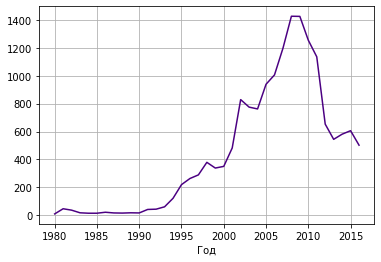

In [29]:
plt.plot(games_data.pivot_table(index='year_of_release', values='name', aggfunc='count'), 
         color='indigo')
plt.xlabel('Год')
plt.grid()

<a id='section_id301'></a>
<hr>
<b>
<div class="alert alert-block alert-info">

<a id='conc_3_1_id'></a>


Вышеуказанный график можно интерпретировать как несколько этапов или же сегментов:
- стагнация (период с начала 1980 по 1993)
- рост (период с 1993 по 2000)
-  бум (период с 2000 по 2010)
-  падение (период с 2010 по 2015)
Как видно каждый период +- захватывает десятилетие. Сейчас мы изучаем преиод падения, возможно следующее за этим 10-тие(то в котором мы сейчачс живём) будет периодом устойчивого роста.

    
<b/>    
</div>    
<hr> 

#### Распределение по платформам

Посмотрим как менялись продажи по платформам. Выясним какие из них самые прибыльные. А также вычислим сколько примерно "живёт" платформа.

[Сразу к ответу про средний возраст платформы](#section_id303)

[Сразу к ответу про прибильность платформ](#section_id304)


Для начала выберем платформы с наибольшими суммарными продажами.

In [30]:
top_ten_platforms = games_data.pivot_table(
    index='platform', 
    values='total_sales', 
    aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10)

In [31]:
top_ten_platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Абсолтным лидером является PS2, далее идут X360 и PS3.

Теперь построим распределение по годам по выбранному топ-10 платформам.

PS2


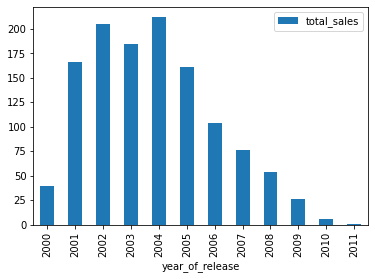

X360


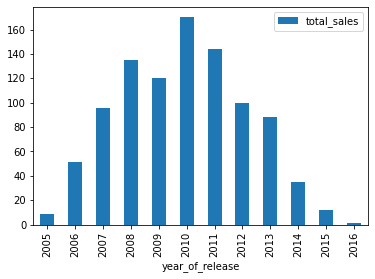

PS3


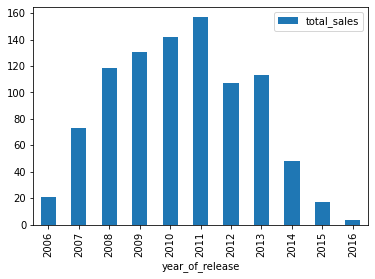

Wii


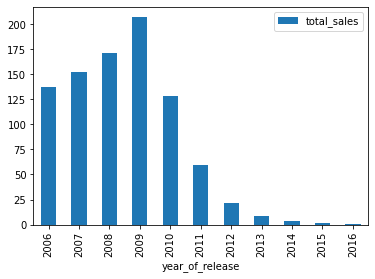

DS


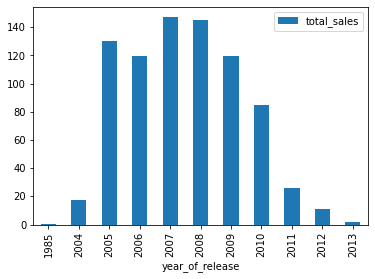

PS


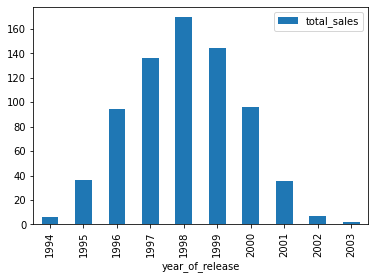

In [32]:
platform_sales = (
    games_data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)
for platform in platform_sales.index[:6]:
    print(platform)
    (games_data
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.show()

<a id='conc_3_2_id'></a>

Из графиков можно сделать вывод, что в наблюдается общий тренд на снижение на всех консолях. Если брать последние года, то преимущество у PS4,PC и PS3.

Минимальный период из топ-10 это 1994, поэтому будем считать что необходимый для изучения период начинается именно с этого времени.

In [33]:
actual_games_data = games_data.query('year_of_release >= 1994')

In [34]:
dfmax = actual_games_data.groupby('platform')['year_of_release'].max()
dfmin = actual_games_data.groupby('platform')['year_of_release'].min()

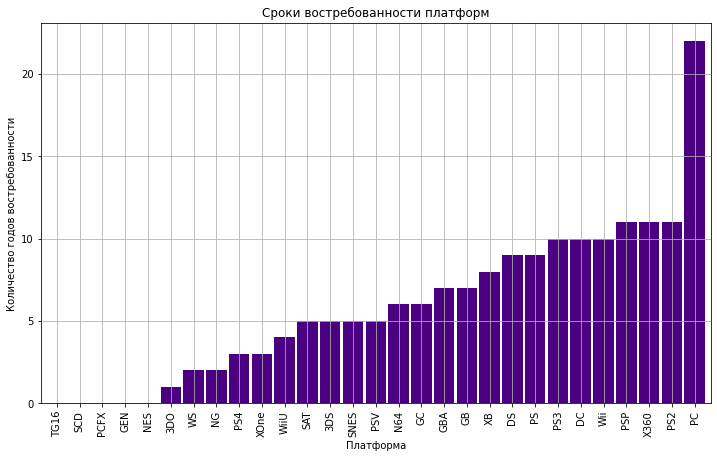

In [35]:
df_all = pd.concat([dfmax, dfmin], axis=1)
df_all.columns = ['max_release', 'min_release']
df_all['age']=df_all['max_release']-df_all['min_release']
df_all['age'].sort_values().plot(title='Сроки востребованности платформ',
                        xlabel='Платформа',
                        ylabel='Количество годов востребованности',
                        kind='bar',
                        stacked=True,
                        grid=True,
                        color='indigo',
                        width=0.9,
                        figsize=(12,7));

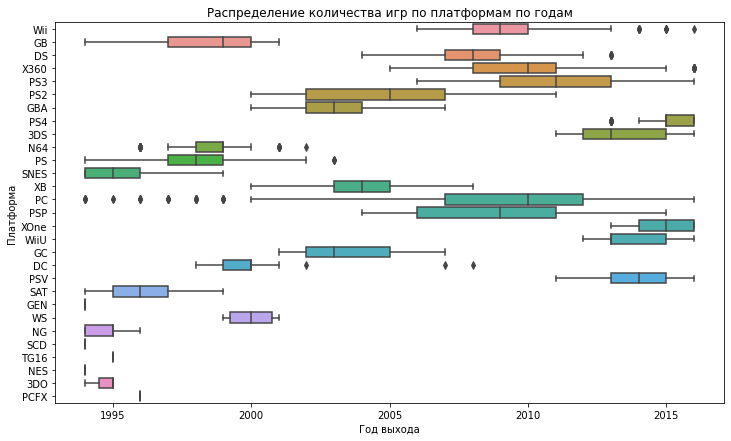

In [36]:
plt.figure(figsize=(12,7))
sns.boxplot(
    data=actual_games_data, 
    x='year_of_release', 
    y='platform'
    ).set(xlabel='Год выхода', 
                      ylabel='Платформа', 
                      title='Распределение количества игр по платформам по годам'
                      );

In [37]:
df_all['age'].mean()

5.931034482758621

<a id='conc_3_3_id'></a>
<a id='section_id303'></a>
<div class="alert alert-block alert-info">
<b>

Долгожителями является компьютер и GB, в среднем же платформа живет порядка  _5-6 лет._
Как видно из графика активными консолями являются порядка 9 платформ.
Это Wii,X360,PS3,PS4,3DS,PC,XOne,WiiU и PSV. Четыре из них в нашем списке топов отсутствуют. Посмотрим распределение по ним.
    
</b>
</div> 

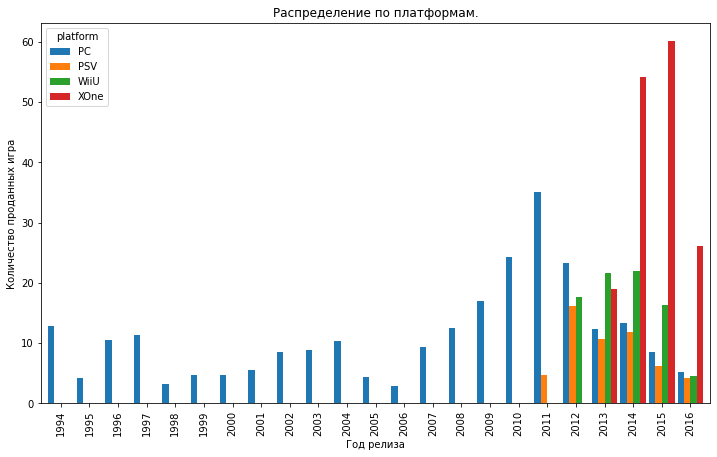

In [38]:
platforms = ['PC','PSV','WiiU','XOne']
df_notop_platforms = actual_games_data.query('platform in @platforms').reset_index(drop=True)
df_notop_platforms.pivot_table(
    index='year_of_release', 
    values='total_sales',
    columns='platform',
    aggfunc='sum').plot(title='Распределение по платформам.',
                        xlabel='Год релиза',
                        ylabel='Количество проданных игра',
                        kind='bar',
                        figsize=(12,7),
                         width=0.9);

<b>
<div class="alert alert-block alert-info">

Так как мы имеем дело с динамично меняющейся индустрией как компьютерные игры, мы возьмём данные не более чем за 2-3 года.
</div> 
</b>    

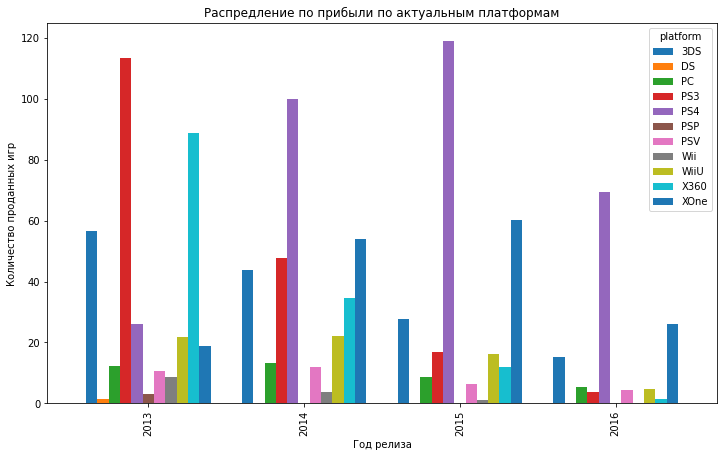

In [39]:
recent_games_data = actual_games_data.query('year_of_release >= 2013')
recent_games_data.pivot_table(index='year_of_release', 
                              columns='platform', 
                              values='total_sales', 
                              aggfunc='sum').plot(kind='bar', 
                                                  figsize=(12,7), 
                                                  width=0.8).set(xlabel='Год релиза', 
                                                                 ylabel='Количество проданных игр', 
                                                                 title='Распредление по прибыли по актуальным платформам');

<div class="alert alert-block alert-info">
<a id='section_id304'></a>
    
Судя по графику прибыльными платформами можно назвать, которые являются актуальными(новыми) версиями и имеют неплохие прогнозируемые продажи (~ > 1 млн в 2016.)
Такими платформами являются:
* 3DS - вышла в 2011, на момент исследования является последней (новейшей актуальной) платформой компании
    [источник](https://ru.wikipedia.org/wiki/Nintendo_3DS )
* PS4 - вышла в 2013 на момент исследования является флагманом и лидером в серии
    [источник](https://ru.wikipedia.org/wiki/PlayStation_4 "ссылка на источник")
* PSV - вышла в 2011 году, на момент исследования является актуальной попыткой sony играть на рынке портативных консолей
    [источник](https://ru.wikipedia.org/wiki/PlayStation_Vita "ссылка на источник")
* Wii U - вышла в 2011 году. Является актуальной версией в серии.
    [источник](https://ru.wikipedia.org/wiki/Wii_U "ссылка на источник")
* Xone - вышла в 2013 году. Является последней в серии (на момент исследования)   
    [источник](https://ru.wikipedia.org/wiki/Xbox_One "ссылка на источник")
* <b>PC</b> вопрос с этой платформой актуален. В отличие от остальных, он обновляется, не появялется новый компьютер с названием компьютер 2.0, а первоначальная версия постоянно обновляется, дополняется. Для полноты исследования изучим и эту платформу.
</div> 

#### Изучим наши топ-платформы подробнее
<b>
<div class="alert alert-block alert-info">
    Берем интересующий нас список платформ
</div> 
    
[Если лень читать код - сразу к выводу](#section_id305)    

</b>


In [40]:
platforms = ['3DS','PS4','PSV','WiiU','XOne','PC']

In [41]:
recent_games_data['year_of_release'].unique()

<IntegerArray>
[2013, 2015, 2014, 2016]
Length: 4, dtype: Int64

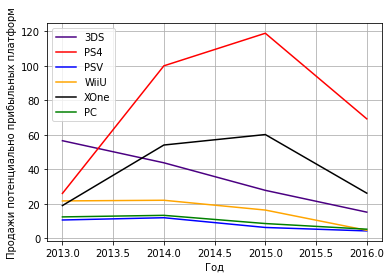

In [42]:
plt.plot(recent_games_data.query('platform == "3DS"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='indigo', label='3DS')
plt.plot(recent_games_data.query('platform == "PS4"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='red',  label='PS4')

plt.plot(recent_games_data.query('platform == "PSV"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='blue',  label='PSV')

plt.plot(recent_games_data.query('platform == "WiiU"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='orange', label='WiiU')

plt.plot(recent_games_data.query('platform == "XOne"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='black', label='XOne')

plt.plot(recent_games_data.query('platform == "PC"').pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'),
         color='green', label='PC')


plt.xlabel('Год')
plt.ylabel('Продажи потенциально прибыльных платформ')
plt.legend()
plt.grid()

<div class="alert alert-block alert-info">
<a id='question1'></a> 
Я не очень понял, почему поле по году превратилось в float, тем не менее из графика всё равно можно выяснить, что все платформы в данный момент переживают падение(но это общая ситуация на рынке), если говорить отдельно про конкуренцию между платформами то лучше всех себя показывют три платформы <b>(PS4,Xone,3ds)</b>. Если появление первых двух вполне объяснимо - новые из своей серии домашние платформы, то успех 3DS пока не понятен, возможно если посмотреть по странам, то объяснение само собой найдется. 
    
[Ответ на загадку с 3DS](#section_id3ds)
    
<b>Мы же пока построим свечи с распределением по количеству проданных игр</b>
</div> 

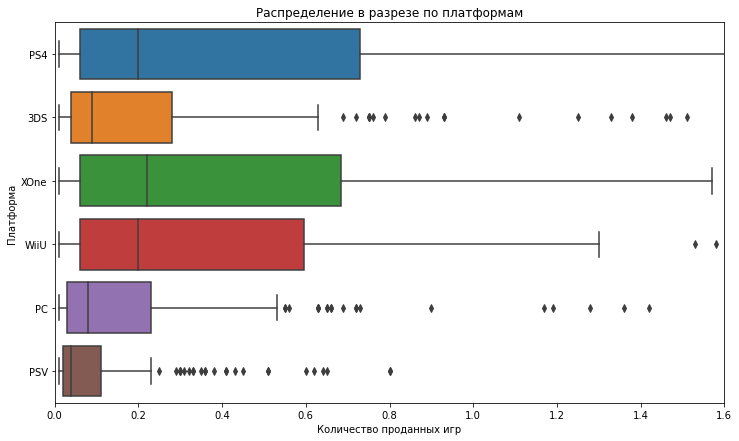

In [43]:
recent_games_data = recent_games_data.query('platform in @platforms')
plt.figure(figsize=(12,7))
sns.boxplot(data=recent_games_data, 
            y='platform', 
            x='total_sales').set(xlim=(0, 1.6), 
                                 title='Распределение в разрезе по платформам', 
                                 xlabel='Количество проданных игр', 
                                 ylabel='Платформа');

<div class="alert alert-block alert-info">
    Самое высокое медианное значение у Xone, рядом другие домашние платформы - WiiU и XOne. За ними следуют уже ручные платформы и компьютер. Игры на домашних платформах в среднем дороже нежели на ручных.
</div> 

In [44]:
recent_games_data.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).head(3)

,total_sales
platform,
PS4,314.14
XOne,159.32
3DS,143.25


<div class="alert alert-block alert-info">
   По суммарной прибыли, эти же три платформы являются лидерами. Ими обозначим наш новый топ.
</div> 

In [45]:
top_3_platforms = ['PS4','XOne','3DS']

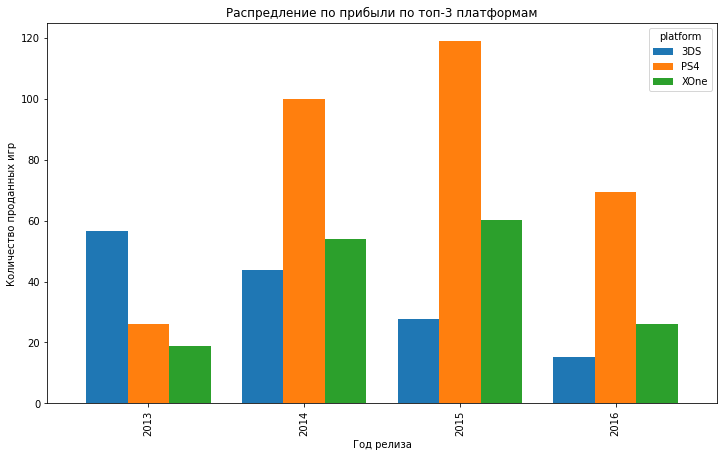

In [46]:
top_3_data = recent_games_data.query('platform in @top_3_platforms')
top_3_data.pivot_table(index='year_of_release', 
                              columns='platform', 
                              values='total_sales', 
                              aggfunc='sum').plot(kind='bar', 
                                                  figsize=(12,7), 
                                                  width=0.8).set(xlabel='Год релиза', 
                                                                 ylabel='Количество проданных игр', 
                                                                 title='Распредление по прибыли по топ-3 платформам');

<a id='section_id305'></a>
<div class="alert alert-block alert-info">
Судя по всему 3Ds уже отживает своё, но еще несколько лет будет на плаву, а вот Xone и PS4 похоже, будут лидерами в отрасли еще несколько лет. С другой стороны конкурент в виде vita с рынка считай ушел, и конкуренции именно на рынке ручных платформ не предвидится, поэтому возможно 3ds пока рано списывать со счётов.
</div> 

#### Влияние критиков и пользователей

[Если лень читать код - сразу к выводу](#section_id306)    

<div class="alert alert-block alert-info">
Посмотрм как влияют на продажи потенциально прибыльных платформ отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Возьмем все потенциальные платформы, не только наш топ-3
</div> 

0.22541755955283052

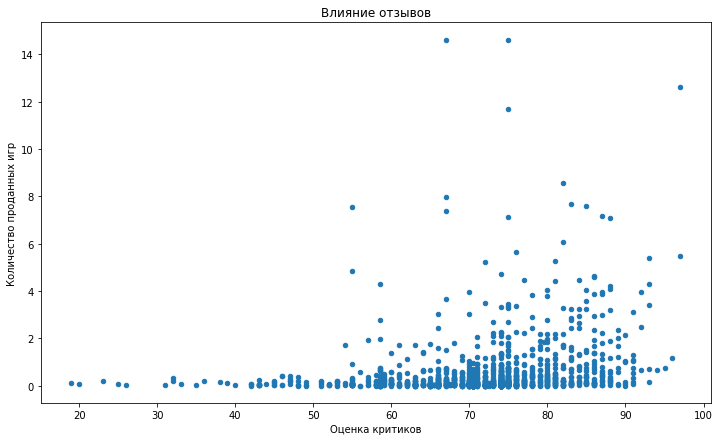

In [47]:
recent_games_data.query('critic_score > 0').plot(kind='scatter',
                                          x='critic_score',
                                          y='total_sales',
                                          figsize=(12,7)).set(title='Влияние отзывов',
                                                              xlabel='Оценка критиков',
                                                              ylabel='Количество проданных игр');
recent_games_data.query('critic_score > 0')['total_sales'].corr(games_data.query('critic_score > 0')['critic_score'])

<div class="alert alert-block alert-info">

Корреляция существует но не достаточно сильная, чтобы иметь глобальное значение (коэффициент порядка 0.22)
</div> 

-0.009525964027286183

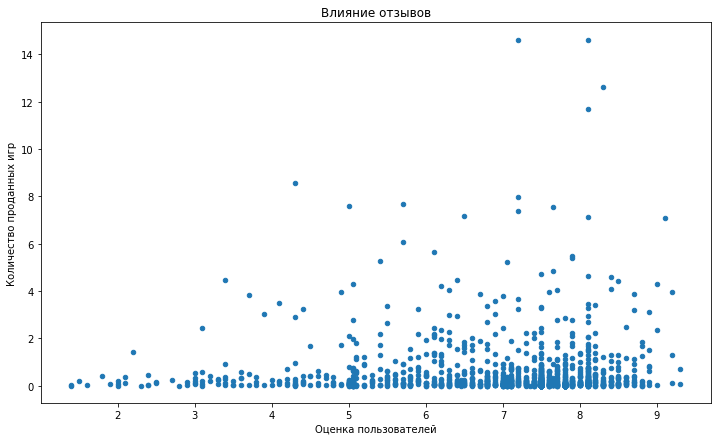

In [48]:
recent_games_data.query('user_score  > 0').plot(kind='scatter',
                                         x='user_score',
                                         y='total_sales',
                                         figsize=(12,7)).set(title='Влияние отзывов',
                                                             xlabel='Оценка пользователей',
                                                             ylabel='Количество проданных игр');
recent_games_data.query('user_score  > 0')['total_sales'].corr(games_data.query('user_score  > 0')['user_score'])

Оценки пользователей еще меньше влияют чем оценки критиков, корелляция даже отрицательная.

Посмотрим влияние оценок критиков и пользователей на наш топ-3.

0.30728824874314714

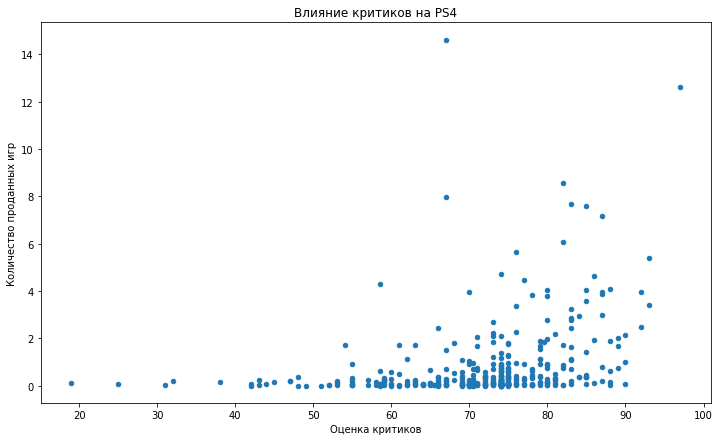

In [49]:
top_3_data.query('critic_score  > 0 & platform=="PS4"').plot(kind='scatter',
                                                             x='critic_score',
                                                             y='total_sales',
                                                             figsize=(12,7)).set(title='Влияние критиков на PS4',
                                                                                 xlabel='Оценка критиков',
                                                                                 ylabel='Количество проданных игр');
top_3_data.query('critic_score  > 0 & platform=="PS4"')['total_sales'].corr(top_3_data.query('critic_score  > 0 & platform=="PS4"')['critic_score'])

0.33460186171972073

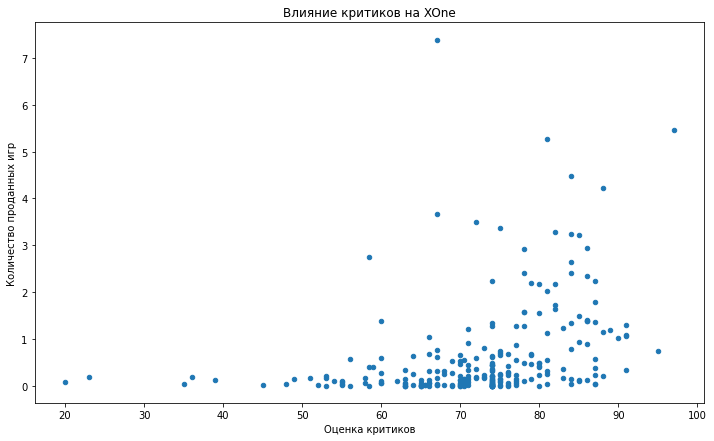

In [50]:
top_3_data.query('critic_score  > 0 & platform=="XOne"').plot(kind='scatter',
                                                              x='critic_score',
                                                              y='total_sales',
                                                              figsize=(12,7)).set(title='Влияние критиков на XOne',
                                                                                  xlabel='Оценка критиков',
                                                                                  ylabel='Количество проданных игр');
top_3_data.query('critic_score  > 0 & platform=="XOne"')['total_sales'].corr(top_3_data.query('critic_score  > 0 & platform=="XOne"')['critic_score'])

0.13634214472255568

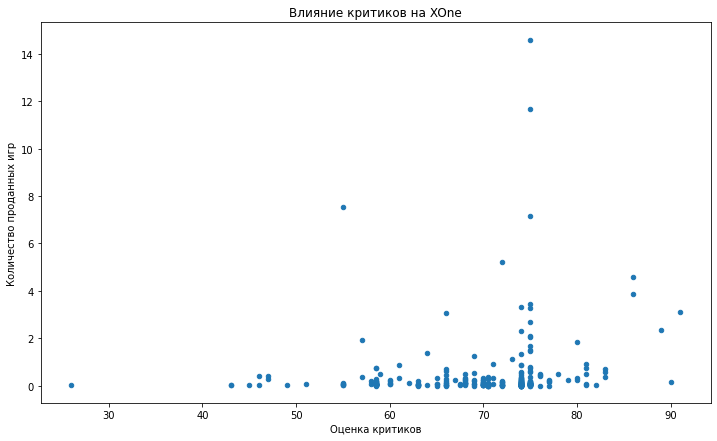

In [51]:
top_3_data.query('critic_score  > 0 & platform=="3DS"').plot(kind='scatter',
                                                              x='critic_score',
                                                              y='total_sales',
                                                              figsize=(12,7)).set(title='Влияние критиков на XOne',
                                                                                  xlabel='Оценка критиков',
                                                                                  ylabel='Количество проданных игр');
top_3_data.query('critic_score  > 0 & platform=="3DS"')['total_sales'].corr(top_3_data.query('critic_score  > 0 & platform=="3DS"')['critic_score'])

<div class="alert alert-block alert-info">

Из этих трех у playstation и xbox вляние критиков выше среднего по больнице, но все также мало, чтобы можно было сказать о сильном влиянии. А вот на 3Ds мнение критиков влияет еще меньше. Из разряда собаки лают караван идёт.
    
Посмотрим на влияние пользователей.
</div> 

-0.06162204397770767

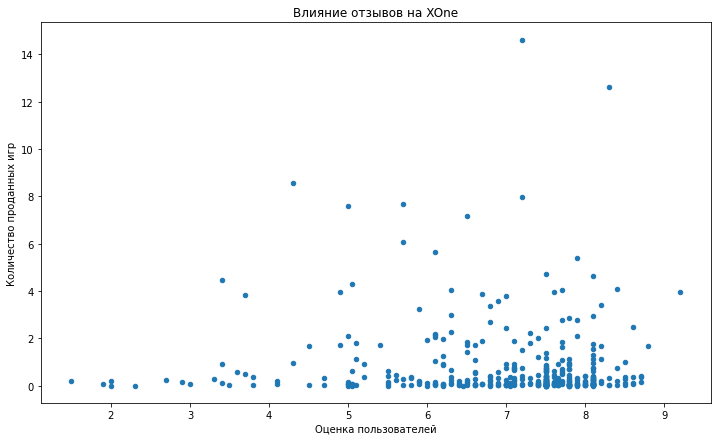

In [52]:
top_3_data.query('user_score  > 0 & platform=="PS4"').plot(kind='scatter',
                                                           x='user_score',
                                                           y='total_sales',
                                                           figsize=(12,7)).set(title='Влияние отзывов на XOne',
                                                                               xlabel='Оценка пользователей',
                                                                               ylabel='Количество проданных игр');
top_3_data.query('user_score  > 0 & platform=="PS4"')['total_sales'].corr(top_3_data.query('user_score  > 0 & platform=="PS4"')['user_score'])

-0.10205270905429946

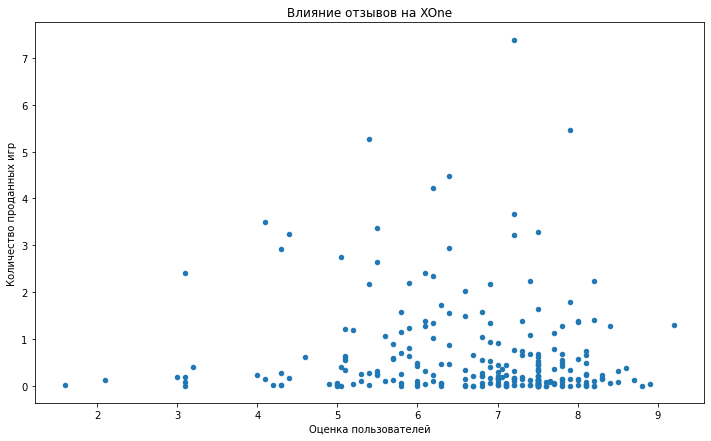

In [53]:
games_data.query('user_score  > 0 & platform=="XOne"').plot(kind='scatter',
                                                            x='user_score',
                                                            y='total_sales',
                                                            figsize=(12,7)).set(title='Влияние отзывов на XOne',
                                                                                xlabel='Оценка пользователей',
                                                                                ylabel='Количество проданных игр');
games_data.query('user_score  > 0 & platform=="XOne"')['total_sales'].corr(games_data.query('user_score  > 0 & platform=="XOne"')['user_score'])

0.15482068432009238

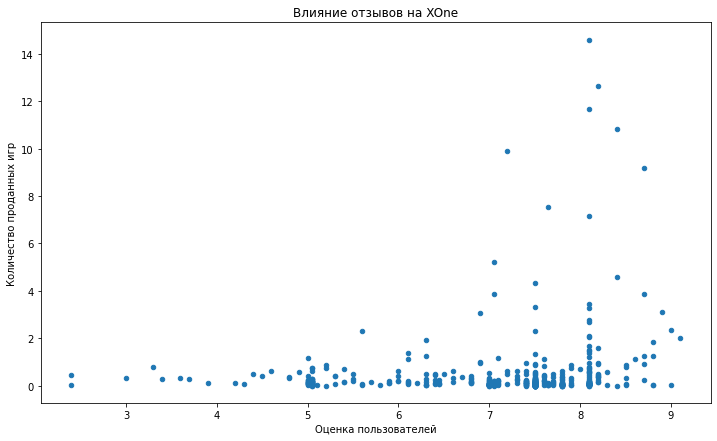

In [54]:
games_data.query('user_score  > 0 & platform=="3DS"').plot(kind='scatter',
                                                            x='user_score',
                                                            y='total_sales',
                                                            figsize=(12,7)).set(title='Влияние отзывов на XOne',
                                                                                xlabel='Оценка пользователей',
                                                                                ylabel='Количество проданных игр');
games_data.query('user_score  > 0 & platform=="3DS"')['total_sales'].corr(games_data.query('user_score  > 0 & platform=="3DS"')['user_score'])

<a id='section_id306'></a>
<div class="alert alert-block alert-info">
Для домашних платформ, работает правило чем хуже тем лучше - вероятно отрицательный пиар не бывает плохим. А вот для ручной платформы мнение пользователей намного важнее и значительнее. Тем не менее в разы по всем платформам мнение пользователей не имеет такого влияние на продажи, как мнение критиков. Что если подумать на самом деле печально.
</div> 

#### Распределение  игр по жанрам

[Если лень читать код - сразу к выводу](#section_id307)    

Посмотрим на общее распрежеление игр по жанрам. Выявим самые прибыльные жанры, увидим есть какие жанры самые прибыльные/самые убыточные.

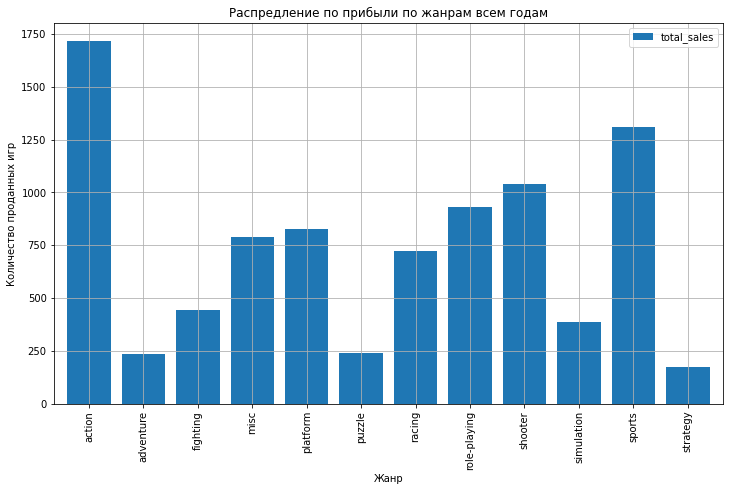

In [55]:
games_data.pivot_table(index='genre',
                              values='total_sales', 
                              aggfunc='sum').plot(kind='bar', 
                                                  figsize=(12,7), 
                                                  width=0.8,
                                                  grid=True).set(xlabel='Жанр', 
                                                                 ylabel='Количество проданных игр', 
                                                                 title='Распредление по прибыли по жанрам всем годам');

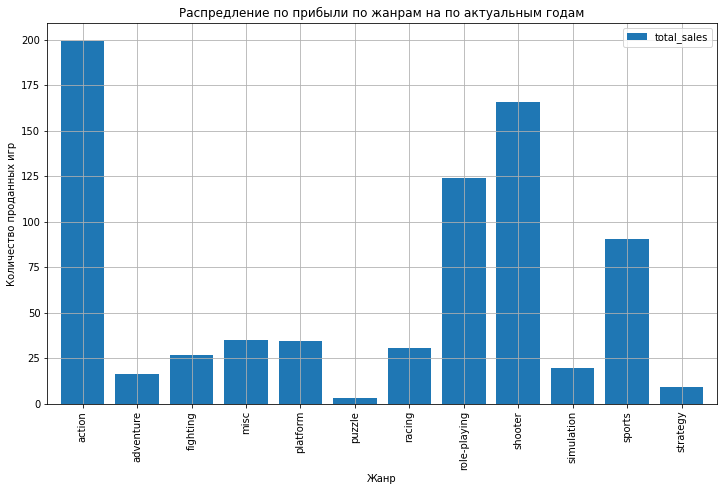

In [56]:
recent_games_data.pivot_table(index='genre',
                              values='total_sales', 
                              aggfunc='sum').plot(kind='bar', 
                                                  figsize=(12,7), 
                                                  width=0.8,
                                                  grid=True).set(xlabel='Жанр', 
                                                                 ylabel='Количество проданных игр', 
                                                                 title='Распредление по прибыли по жанрам на по актуальным годам');

Как видно из диаграмм, жанр action является самым прибыльным как на всей выборке, так и на актуальных данных. А вот жанр puzzle и strategy проверку временем проходит очень плохо, в связи с чем и прибыльность подобных игр меньше.

[(0.0, 1.6),
 Text(0.5, 1.0, 'Распределение в разрезе по жанрам'),
 Text(0.5, 0, 'Количество проданных игр'),
 Text(0, 0.5, 'Жанр')]

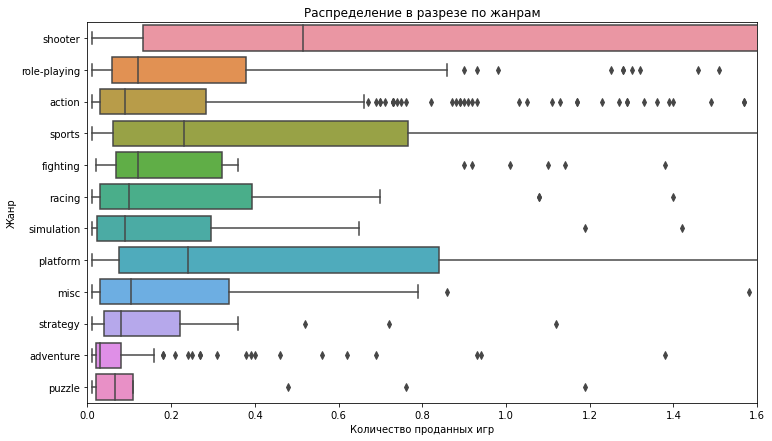

In [57]:
plt.figure(figsize=(12,7))
sns.boxplot(data=recent_games_data, 
            y='genre', 
            x='total_sales').set(xlim=(0, 1.6), 
                                 title='Распределение в разрезе по жанрам', 
                                 xlabel='Количество проданных игр', 
                                 ylabel='Жанр')

<a id='section_id307'></a>
<div class="alert alert-block alert-info">
<b>   
    
- Несмотря на то, что action является самым прибыльным, медианное значение по нему далеко не самое большое. А это значит, что на рынке огромное количество недорогих schooter игр.
- Лидером же по медианному значению является shooter. По нему игры самые дорогие. А вот по puzzle и adventure игры самые дешевые, поэтому прибыли они особо и не принесли. Вероятно с низкой прибыльностью и стоит объяснение почему люди перестали покупать puzzle, гораздо проще играть в бесплатную версию.
    
</b>    
</div> 

### Портрет пользователя каждого региона.

[Если лень читать код - сразу к промежуточному выводу 1](#section_id308)  
[Если лень читать код - сразу к промежуточному выводу 2](#section_id309)

Определим для пользователя каждого региона (NA,EU,JP):
* Самые популярные платформы;
* Самые популярные жанры;
* Влияние рейтинга ESRB на продажи.

In [58]:
games_data['na_eu_jp'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales']
games_data['na_part']= games_data['na_sales'] /games_data['na_eu_jp']
games_data['eu_part']= games_data['eu_sales'] /games_data['na_eu_jp']
games_data['jp_part']= games_data['jp_sales'] /games_data['na_eu_jp']
recent_games_data = games_data.query('year_of_release >= 2012')

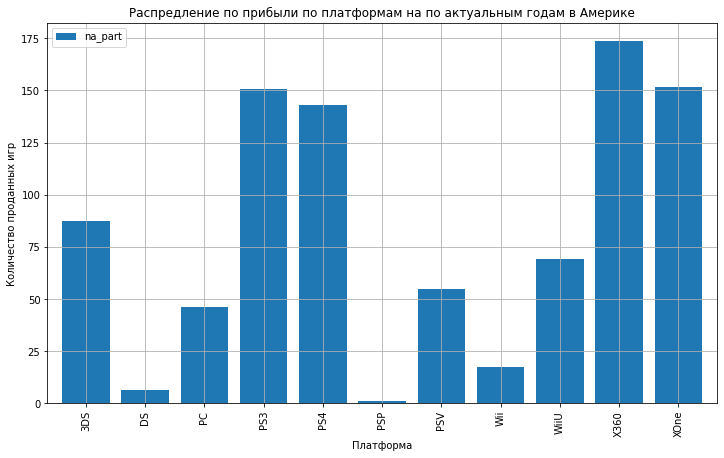

In [59]:
recent_games_data.pivot_table(index='platform',
                              values='na_part', 
                              aggfunc='sum').plot(kind='bar', 
                                                  figsize=(12,7), 
                                                  width=0.8,
                                                  grid=True).set(xlabel='Платформа', 
                                                                 ylabel='Количество проданных игр', 
                                                                 title='Распредление по прибыли по платформам на по актуальным годам в Америке');

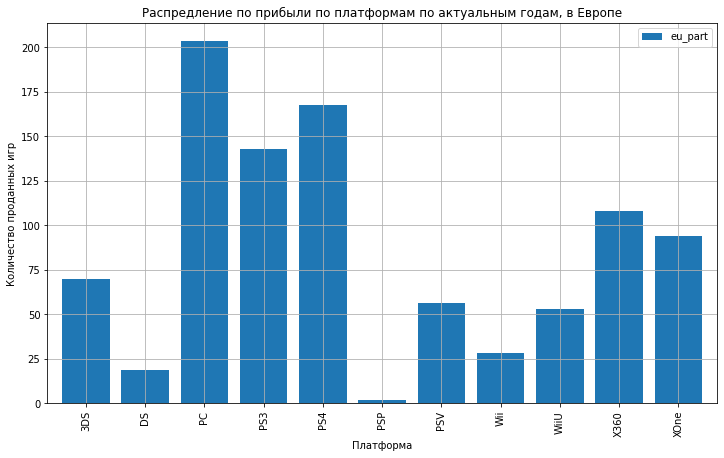

In [60]:
recent_games_data.pivot_table(index='platform',
                              values='eu_part', 
                              aggfunc='sum').plot(kind='bar', 
                                                  figsize=(12,7), 
                                                  width=0.8,
                                                  grid=True).set(xlabel='Платформа', 
                                                                 ylabel='Количество проданных игр', 
                                                                 title='Распредление по прибыли по платформам по актуальным годам, в Европе');

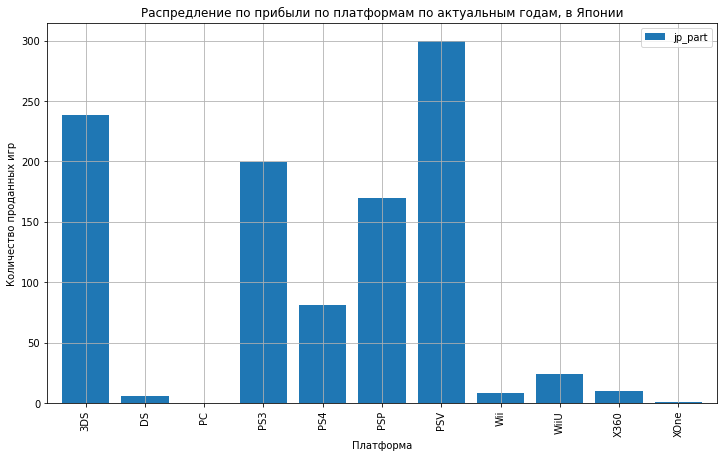

In [61]:
recent_games_data.pivot_table(index='platform',
                              values='jp_part', 
                              aggfunc='sum').plot(kind='bar', 
                                                  figsize=(12,7), 
                                                  width=0.8,
                                                  grid=True).set(xlabel='Платформа', 

                                                                 ylabel='Количество проданных игр', 
                                                                 title='Распредление по прибыли по платформам по актуальным годам, в Японии');

<div class="alert alert-block alert-info">
<a id='section_id308'></a>    
    
Исходя игр графиков, можно сделать вывод, что Америка и Европа предпочитают больше времени играть в консоли домашние , в Японии же больше отдают большее предпочитение карманным игровым консолям. <B> Это к слову, объясняет почему в наш топ 3 попал 3ds, который в других странах не так сильно котируется. Япония создаёт большую часть продаж этой платформе, за счёт чего она в общей картине кажется лидером общим, хотя по факту является лидером локальным.</B>
<a id='section_id3ds'></a>


</div> 

Посмотрим на самые популярные жанры.

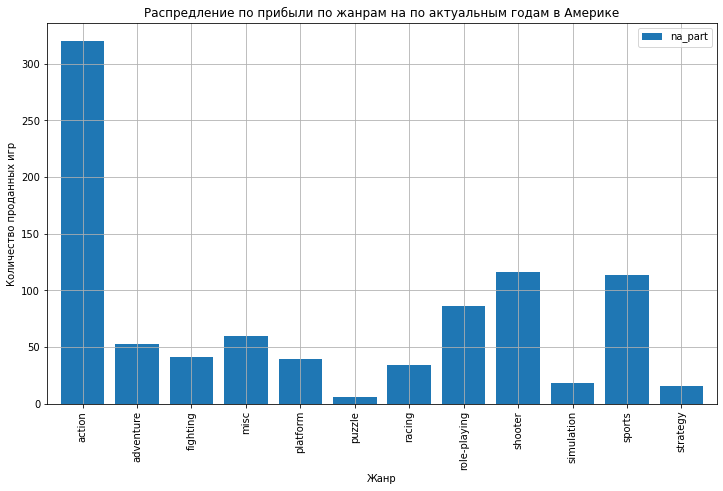

In [62]:
recent_games_data.pivot_table(index='genre',
                              values='na_part', 
                              aggfunc='sum').plot(kind='bar', 
                                                  figsize=(12,7), 
                                                  width=0.8,
                                                  grid=True).set(xlabel='Жанр', 
                                                                 ylabel='Количество проданных игр', 
                                                                 title='Распредление по прибыли по жанрам на по актуальным годам в Америке');

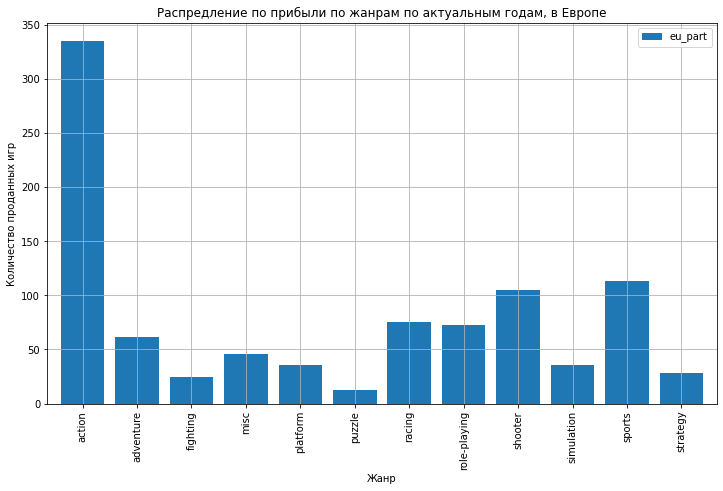

In [63]:
recent_games_data.pivot_table(index='genre',
                              values='eu_part', 
                              aggfunc='sum').plot(kind='bar', 
                                                  figsize=(12,7), 
                                                  width=0.8,
                                                  grid=True).set(xlabel='Жанр', 
                                                                 ylabel='Количество проданных игр', 
                                                                 title='Распредление по прибыли по жанрам по актуальным годам, в Европе');

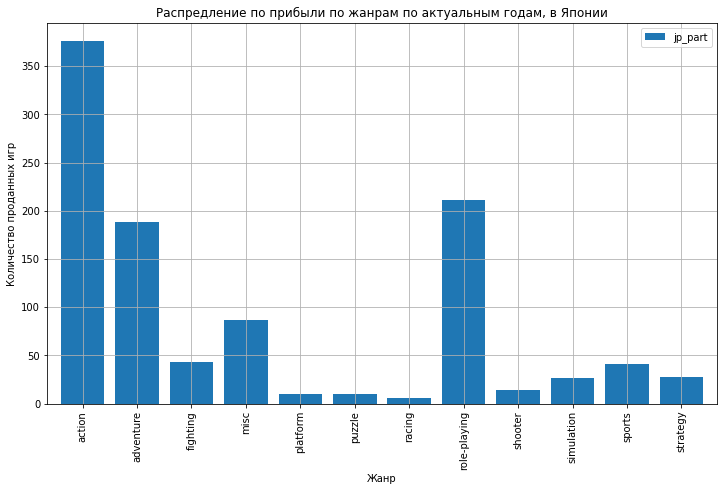

In [64]:
recent_games_data.pivot_table(index='genre',
                              values='jp_part', 
                              aggfunc='sum').plot(kind='bar', 
                                                  figsize=(12,7), 
                                                  width=0.8,
                                                  grid=True).set(xlabel='Жанр', 
                                                                 ylabel='Количество проданных игр', 
                                                                 title='Распредление по прибыли по жанрам по актуальным годам, в Японии');

<a id='section_id309'></a>

Если есть то, что объединяет европейца, амерканца и японца, так это любовь в играм в жанре action. В остальном тройного пересения множеств по топ-5 жанрам нет. 

Посмотрим влияет ли рейтинг ESRV на продажи в отдельном регионе.

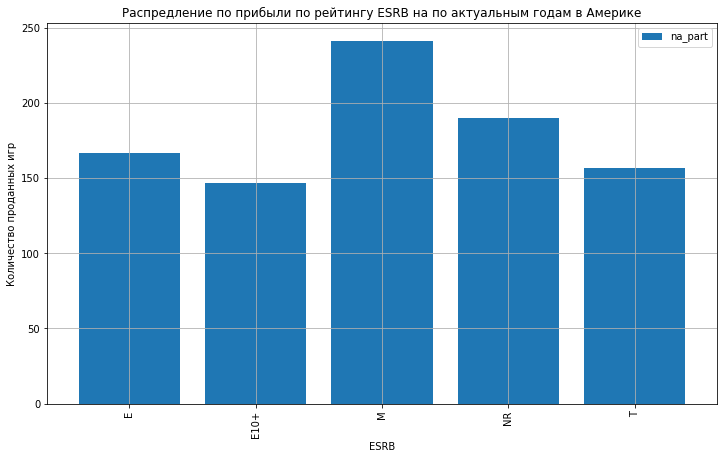

In [65]:
recent_games_data.pivot_table(index='rating',
                              values='na_part', 
                              aggfunc='sum').plot(kind='bar', 
                                                  figsize=(12,7), 
                                                  width=0.8,
                                                  grid=True).set(xlabel='ESRB', 
                                                                 ylabel='Количество проданных игр', 
                                                                 title='Распредление по прибыли по рейтингу ESRB на по актуальным годам в Америке');

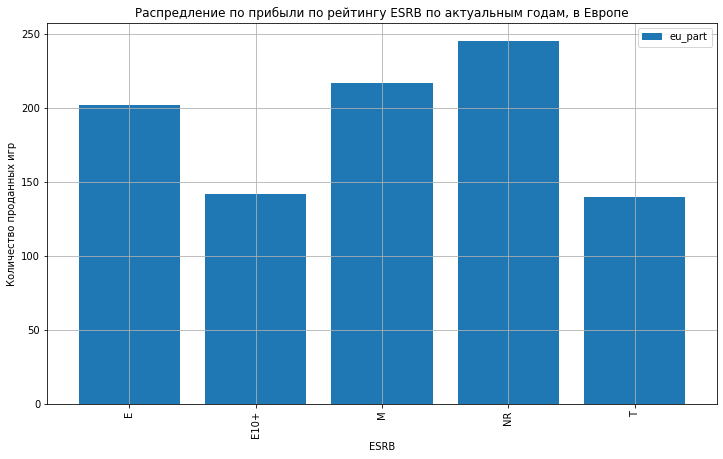

In [66]:
recent_games_data.pivot_table(index='rating',
                              values='eu_part', 
                              aggfunc='sum').plot(kind='bar', 
                                                  figsize=(12,7), 
                                                  width=0.8,
                                                  grid=True).set(xlabel='ESRB', 
                                                                 ylabel='Количество проданных игр', 
                                                                 title='Распредление по прибыли по рейтингу ESRB по актуальным годам, в Европе');

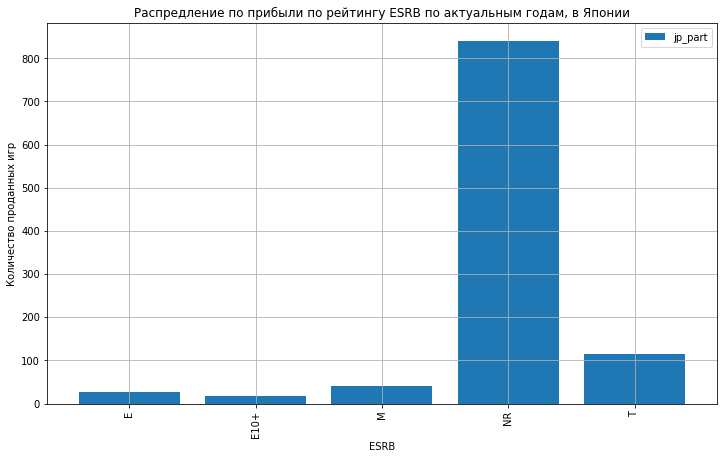

In [67]:
recent_games_data.pivot_table(index='rating',
                              values='jp_part', 
                              aggfunc='sum').plot(kind='bar', 
                                                  figsize=(12,7), 
                                                  width=0.8,
                                                  grid=True).set(xlabel='ESRB', 
                                                                 ylabel='Количество проданных игр', 
                                                                 title='Распредление по прибыли по рейтингу ESRB по актуальным годам, в Японии');

In [68]:
nr_games = recent_games_data.query('rating=="NR"')

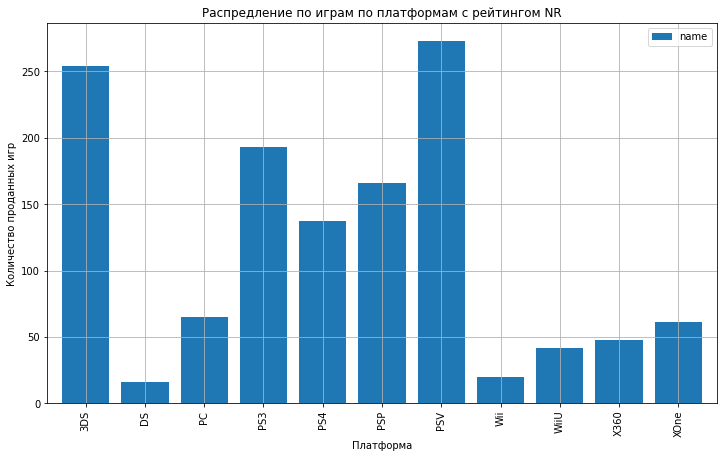

In [69]:
nr_games.pivot_table(index='platform',
                              values='name', 
                              aggfunc='count').plot(kind='bar', 
                                                  figsize=(12,7), 
                                                  width=0.8,
                                                  grid=True).set(xlabel='Платформа', 

                                                                 ylabel='Количество проданных игр', 
                                                                 title='Распредление по играм по платформам с рейтингом NR');

Исходя из графиков можно сделать вывод, что Американцы любят взрослые игры и те которые можно всем, Европейцы имеют +- схожие взгляды, а вот Японцы в основном играют в игры без экспертного мнения ESRB.

<b>
<div class="alert alert-block alert-info">
Ранее мы выяснили, что японцы предпочитают играть в ручные консоли, нежели в домашние, также мы увидели, что игры для ручных консолей чаще остальных получают рейтинг NR, собственно из этого можно сделать вывод, что не японцы любят игры с рейтингом NR, а игры в которые играют японцы чаще всего агентством не оцениваются.
<a id='the_destination'></a>
</div> 
</b>

<a id='section_id3'></a>
### Краткий вывод по третьему шагу.

1) Проанализировав данные выяснилось, что:
* В период с 2000 года количество проданных игр увеличилось в разы. Разедлить их можно на четыре периода (стагнация, рост, бум, падение)
* Проанализировав рапрседеление по годам и платфорама можно увидеть общий тренд на снижение количества проданных игр. Тем не менее общие лидеры как PS4,PS3 и PC на общем фоне незначительно но выделеляются.
* Самой востребованной платформой можно назвать - компьютер. Но это скорее всего исключение из правил. В среднем же игровая платформа "живет" порядка 6 лет. Компьютер же не меняется, меняются его состовляющие (видеокарта/оперативная память и т.д.) создание новой платформы означает смерть прошлой.
* Так если посмотреть на пики продаж по платформам за актуальную дату, то можно увидеть как снисходящяя волна PS3 сменяется восходящей волной продаж игр по PS4, аналогичная ситуация с платформой Xbox(XboxOne Xbox360). В следствии чего, можно сделать вывод, что владельцы  таких платформ как WII или DS, просто не создалие новую серию платформ. Тем не менее их платформа 3ds приносит им много денег (в основном за счёт покупателей из Японии)
* Влияние критиков и оценок пользователей не равнозначно. Так влияние критиков имеет большую корреляцию нежели оценки пользователей. Но не всё так однозначно, для PS4 и Xone мнение зрителей даже имеет отрциательную корреляцию, в отличие от 3Ds на которых влияние зрителей влияет сильнее, но не так сильно как мнение критиков.
* Также проанализировав популярные жанры мы выясниили что все любят action, но вот шутер имеет самый высокое значение медианное, значит на рынке много недорогого shootera. Людям интересен занимательный сюжет, но за пострелять и поубивать они готовы платить недорого. А вот puzzle как жанр умирает, виной тому низкая прибыльность и как мы предполагаем несложность в создании. Людям проще скачать бесплатную версию и смотреть с рекламой нежели купить отдельный без рекламы.

2) Составив портрет пользователя трех разные регионов удалось опеделить, что:
* Самыми популярными платформами в Америке и Европе являются "домашние" платформы, в отличие от Японии, где предпочитают ручные консоли. Также любопытно, что в Европе лидирующей платформой является компьютер, когда как в америке это xbox, а в Японии nintendo. Успех nintendo в Японии настолько высокий, что делает для них болшую часть выручки.
* Распределение по жанрам показало, что все любят игры жанра action. В остальном имеются перевесы в одну или другую сторону. Так можно утверждать, что японцы любят играть в role-playing и adventure. Что вполне объяснимо, ибо большая часть игра, что выпускается на ручные консоли имеют именно эти жанры(или action). В америке или европе вкусы поразнообразнее, больше 5 жанров в каждой выборке преодолевают порог значения в 50. 
* Можно интерпетировать результаты зависимости рейтинга ESRB на продажи в виде пьедистала, где на первом месте Америка(где большинство предпочитают взрослые игры, ориентированные на зрелую публику), Европа(где к мнению ESRB прислушиваются, но не слушают внимательно) и Япония, где мнение ESRB слышится легким эхом на фоне и подавляющая часть продаж уходит играм без оценки ESRB. Но проблема тут не в том, что японцы любят запрещенку, а в том, что они чаще играют в игры на ручных платформах, которые оцениваются реже нежеле игры на других платформам, в следствии и появялется данная странность, которая на самом деле совсем не странность.

## Исследования гипотез

Необходимо проверить две гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.
* Средние пользовательские рейтинги жанров Action и Sports разные.

[Сразу к выводу](#section_id4)

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.
Для начала сформулируем нулевую и альтернативную гипотезу.

**H0 = Средние пользовательские рейтинги платформ одинаковы.**

**H1 = Средние пользовательские рейтинги платформ различаются.**

В следствии того, что выборки независимы, в данном случае мы будем использовать T-тестом для двух независимых выборок (ttest_ind())

In [70]:
pc_data = recent_games_data.query('platform=="PC" & user_score>0')
xone_data = recent_games_data.query('platform == "XOne" & user_score>0')
pc_xone_data = recent_games_data.query('(platform == "XOne" & user_score>0) or (platform=="PC" & user_score>0)')

<AxesSubplot:xlabel='platform', ylabel='user_score'>

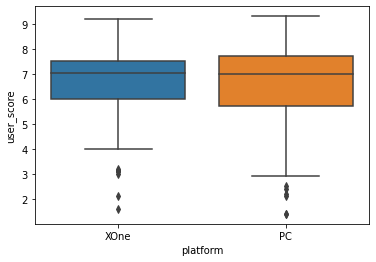

In [71]:
sns.boxplot( x=pc_xone_data["platform"], y=pc_xone_data["user_score"])

<b>
<div class="alert alert-block alert-info">
Как мы видим медианные значения прмиерно равны, надо посчитать дисперсии.
</div> 
</b>

In [72]:
print('Дисперия по PC',pc_data['user_score'].var(ddof=1))
print('Дисперия по Xbox One ',xone_data['user_score'].var(ddof=1))

Дисперия по PC 2.48578313253012
Дисперия по Xbox One  1.677419275204898


<b>
<div class="alert alert-block alert-info">
Посчитаем равенство дисперсий через тест Барлетта
</div> 
</b>

In [73]:
from scipy.stats import bartlett
stat, p = bartlett(pc_data['user_score'], xone_data['user_score'])
p

0.0020908220954498277

In [74]:
alpha = .05
results1 = st.ttest_ind (pc_data['user_score'], xone_data['user_score'], equal_var=True) 

print ('P-значение:', results1.pvalue)

if (results1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-значение: 0.2332556287268601
Не получилось отвергнуть нулевую гипотезу


<a id='section_id11'></a>
Судя по тесту пользовательские рейтинги и в правду одинаковы.

### Средние пользовательские рейтинги жанров Action и Sports разные.
Для начала сформулируем нулевую и альтернативную гипотезу.

**H0 = Средние пользовательские рейтинги жанров Action и Sports одинаковы.**

**H1 = Средние пользовательские ррейтинги жанров Action и Sports различаются.**

В следствии того, что выборки независимы, в данном случае мы будем использовать T-тестом для двух независимых выборок (ttest_ind())

In [75]:
action_data = recent_games_data.query('genre=="action" & user_score>0')
sports_data = recent_games_data.query('genre == "sports" & user_score>0')
action_sports_data = recent_games_data.query('(genre == "action" & user_score>0) or (genre=="sports" & user_score>0)')

<AxesSubplot:xlabel='genre', ylabel='user_score'>

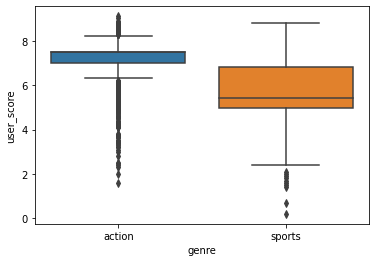

In [76]:
sns.boxplot( x=action_sports_data["genre"], y=action_sports_data["user_score"])

In [77]:
print('Дисперия по action',action_data['user_score'].var(ddof=1))
print('Дисперия по sports ',sports_data['user_score'].var(ddof=1))

Дисперия по action 1.0676257380429972
Дисперия по sports  2.494112024148918


<b>
<div class="alert alert-block alert-info">
Посчитаем равенство дисперсий через тест Барлетта
</div> 
</b>

In [78]:
from scipy.stats import bartlett
stat, p = bartlett(action_data['user_score'], sports_data['user_score'])
p

5.10237797025489e-21

In [79]:
alpha = .05
results1 = st.ttest_ind (action_data['user_score'], sports_data['user_score'], equal_var=False) 

print ('P-значение:', results1.pvalue)

if (results1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-значение: 8.254555991447638e-44
Отвергаем нулевую гипотезу


<a id='section_id12'></a>
Судя по статистическому анализу рейтинги жанров действительно различаются.

### Краткий вывод по четвертому шагу.


<a id='section_id4'></a>
<b>
<div class="alert alert-block alert-info">
    
* Исходя из результатов проверки первой гипотезы можно сказать, что вероятность того, что пользовательские рейтинги между Xbox One и PC разные достаточно низкая. Мы можем склонятся к тому, что скорее всего рейтинги между этими двумя платформами примерно одинаковы.
    
* Исходя из результатов проверки второй гипотезы можно сказать, что вероятность того, что пользовательские рейтинги между action и sports разные достаточно высока, точнее вероятность что они равны слишком низкая.
    
    
</div> 
</b>

## Анализ результатов.

<div style="border-radius: 15px; border: 3px solid black; padding: 15px;">
<div class="alert alert-block alert-info">
 
В данном разделе будет дан вывовод по всему исследованию, с кратким упоминанием всего того, что было сделано.
1. На первом этапе мы ознакомились с содержимым файла games.csv
[Подробнее](#section_id1)
2. Далее мы приступиили к предобратоке данных. 
* Выявив **пустые значения** по столбцам мы **постарались их заполнить**. Так например значения по полю, с годом выпуска игры мы заполнили (для тех кого позволяла) значениями из названия игры, исходя из предположения, что игра имеющая в своём названии год выпускалась в одноименном году. 
* Также мы **привели все столбцы** и значения категориальных переменных **к единообразию** - в нижний регистр.
* Для значений по рейтингу **для пустых проставили** NR(no rating) а для значений оценки критиков и оценки пользователей **использовали медианные значения** в зависимости от жанра игры и рейтинга игры от ESRB, предварительно поменяв значение tbd на пустые.
[Подробнее](#section_id2)

3. Далее мы присутпили к исследовательскому анализу.
*  Посмотрев сколько игр выпускалось в разные годы, мы выявили, что начиная с 2000 года количество проданных игр поступательно **росло**, но любой рост невечен и в данный момент, если анализировать актуальные данные количество проданых игр **падало**.
[Подробнее](#section_id301)
* Выбрав платформы с наибольшими суммарными продажами и построив распределение по годам, мы составили свой топ-платформ. Мы выявили, что **в среднем платформа живет 6 лет**. Исключением является компьютер в силу своей специфики. Она и являлась самой востребованной платформой 
[Подробнее](#section_id303)
* Оперделив среднний срок жизни мы определили несколько **потенциально прибыльных платформ - PS4,3Ds,  Xone**
[Подробнее](#section_id304)
* Построив распределение по каждому и более подробно ознакомившись, мы выяснили что лидерами заслуженно считаются две платформы PS4,Xone. Ручная платформа 3Ds несмотря на то, что показывает не такие высокие цифры, тем не менее не может на данный момент быть выключена из переченя потенциально прибыльных платформ, т.к. явялется последней версией ручной платформы на рынке, по этому её спад, это скорее общий спад спроса на ручные платформы, а свою сегментарную кокнуренцию они выигрывают с лихвой.

* Также посмотрев как влияют на продажи внутри популярных платформ отзывы критиков и пользователей мы выявиили, что **мнение критиков значительно выше коррелирует с продажами нежели мнение пользователей**. Более того, **для ряда популярных платформ мнение пользователей имело отрицатльную корреляцию.** 
[Подробнее](#section_id306) 
* Далее мы посмотрели общее распределение игр по жанрам и выявили, что во всём мире **самый прибыльный жанр - action**, а вот такой **жанр игры как puzzle** (если исходить из данных) уходит в небытие и **является самым не ренталельным.**
[Подробнее](#section_id307)
На следующем шаге мы составили портерт пользователя каждого региона (Северо-американского, Европейского и Японского)
* Сначала выявили самые популярные платформы:
     * В **Америке** отдавали предпочтение xbox 360/Xone/Ps3/ps4/3ds - **большая часть консолей домашняя**, не ручная;
     * В **Европе** PC/ps4/ps3/x360/xone - **все** консоли домашие **не ручные**;
     * В **Японии** psv/3ds/ps3/psp/ps4 - подавляющее большинство **ручные консоли**.
[Подробнее](#section_id308)  
* Потом выявили самые популярные жанры - **Все страны любят жанр action**. В остальном стоит отметить что **европейский и американский пользователь имеет более разнообразный вкус** в жанрах (5 и более жанров с продажами свыше 5 тыс.), в то время как в Японии помимо самого популярного жанра action, эту отметку преодолевает только два жанра (role-playing и adventure) 
* Также мы выясниили что **рейтинг ESRB имеет значение** для **американского рынка и** не так сильно для **европейского**, для **японского же практически не имеет.** но есть нюанс, о котором мы писали ранее (см.подробнее)
[Подробнее](#section_id309)
4. На последнем шаге мы проверили две гипотезы.
* **Гипотеза** о том что средние пользовательские рейтинги платформ одинаковы была отвергнута - P-значение: 0.25 [Подробнее](#section_id11)
* **Гипотеза** о том что средние пользовательские рейтинги жанров Action и Sports одинаковы - не была отвергнута. P-значение: 7.3 [Подробнее](#section_id12)

[Подробнее](#section_id4)

</div>
</div>

<a id='benefit'></a>